# 🍕 Sales Analysis of Plato's Pizza 2015 🍕
#### *by MC364742, Jessica Lai, Weijie*


## Introduction
The dataset was made to analysis the sales of Plato's Pizza in 2015, to optimize the sales distribution and resources of ordering to imporve the efficiency and effectiveness of the fast-food wroking process.

In the tutorial, we'll try to unveil the data of the whole-year selling and see if there's *any factors correlated with sales, quantity or others, also to better know the psychology of the consumer's preference*. All these are handy to optimize the strategy and resources for management.

## 🎯 Target

### The enlightenment by sales trend and customer preference analysis to the resource optimization inspiration. 

We can know the conclusion by the following concerns:
- Which is the peak ordering day in a year?
- Which quarter has the greatest sales?
- What size of the pizza is the most popular and their distribution?
- What are the Top 5 Pizzas by Sales and by Quantity?
- What are the Top 5 most popular pizzas considering of sizes by Quantity?
- No matter for the condition of consideration of size or not, what are the overlapping pizza names of the most popular by orders?
- What is the best-selling pizza category considering of orders?
- What are the Top 5 worst selling pizzas without size consideration?
- Is there any preference implications of size for those veggie-pizza orderers (for diet keeper or vegetarian)?
- What's the percentage for the people ordering more than one pizza in an order?
- What is the most frequently used TOP15 ingredient?
- What is the distribution of prices? What are the prices of different Pizza?
- Does the price have any correlation about the raw material?
- Correlation study between various factors in pizza sales.

# SECTION 1: *FINDING A DATASET*
##### Please download the dataset from the following link
[🍕🍽️ Pizza Restaurant Sales](https://www.kaggle.com/datasets/shilongzhuang/pizza-sales)

*In this study, we'll use the dataset already released on Kaggle.com. Kaggle is a dataset sharing website that lots of resources of dataset can be freely used to practice.*

####  🔧Required Tools
This code is a Python script that introduces some commonly used data analysis and visualization libraries, including pandas, seaborn, and matplotlib. matplotlib modules and functions are also introduced as follows.

The purpose of this code is to import the required libraries/tools and modules so that they can be used in subsequent data analysis and visualization processes.

#### Tools Introduction
1. pandas: Data processing and analysis
2. seaborn: Data visualization library for matplotlib
3. Matplotlib. pylot: the submodule of matplotlib, drawing various types of chart functions
4. matplotlib.dates: provides date and time related functions
5. matplotlib.cm: Map the value to the color space
6. matplotlib.venn: Draw a Venn diagram
7. sklearn.preprocessing LabelEncode: encodes categorical variables

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib_venn import venn2
from sklearn.preprocessing import LabelEncoder

##### *Change the file path according to the path you saved*

You need to find a place easy to be found in the computer and paste the path as follows or you can't not access to the file and read the dataframe. For example, I saved it on the desktop.

In [7]:
# Input file path where you saved the dataframe 
file_path = '/Users/jessicalai/Desktop/course_project/Pizza+Place+Sales/Data Model - Pizza Sales.xlsx'

# Read the dataframe from the file
df = pd.read_excel(file_path)

# SECTION 2:  VISUALIZATION FOR EACH CONCERN

*For the following, python codes and tools installed are used to visualize the concerns which could be helpful to draw conclusions for the overall targets.*

### 1. Which is the peak ordering day in a year?
#### *To visualize the number of orders for each day of the year and find out the peak day among a year.*

There are some foramts the compute doesn't understand, you have to convert the date format in the sequence to a date format. Then groupping orders by date to calculate the total number of orders per day for further determination of the peak day having the most orders.

In [8]:
# Set order_date as datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format="%m/%d")

# Order quantities are grouped and summed by day
daily_quantity = df.groupby(df['order_date'])['quantity'].sum()

# Find the day with the highest sales
peak_day = daily_quantity.idxmax()

Here, you can use the sns. to customize you color palette to make your images more personal. Bar chart and broken chart can both visualize the peak day with highest order easily. Dates are used to be the x-axis while y-axis is for order quantity.

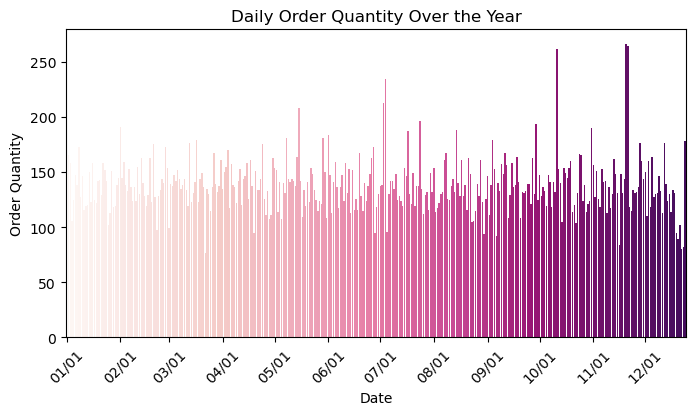

Order Quantity on Peak Day: 266
Peak Ordering Day in a Year: 2015-11-26 00:00:00+00:00


In [19]:
# Use a pink gradient color palette
pink_palette = sns.color_palette("RdPu", n_colors=len(daily_quantity))

# Create a bar chart to visualize the day with the peak order
plt.figure(figsize=(8, 4))
sns.barplot(x=daily_quantity.index, y=daily_quantity.values, hue=daily_quantity.index, palette=pink_palette, legend=False)
plt.title('Daily Order Quantity Over the Year')
plt.xlabel('Date')
plt.ylabel('Order Quantity')

# Convert dates to axis units using date converters
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Convert peak dates to axial units
peak_day = mdates.date2num(peak_day)

# Convert peak day back to datetime object
peak_day = mdates.num2date(peak_day)

# Rotate the x-axis label
plt.xticks(rotation=45)
plt.show()

print("Order Quantity on Peak Day:", daily_quantity.max())
print("Peak Ordering Day in a Year:", peak_day)

From the bar chart above and the output text, we can learn that the peak sales day of the year is <span style="color:purple;">November 26, 2015</span> , which is <span style="color:purple;">Thanksgiving Day</span>  in the US. 

But this is just one day in a year, and broader conclusions are needed if more comprehensive data is needed to deploy resources. So in the next chart we're going to look at how sales are represented in each quarter.

### 2. Which quarter has the greatest sales?
#### *To visualize the number of orders by seasons/quarters of the year.*

First of all, we need to process and group the date data. First, we need to group the date into different quarters based on the order date. By comparing the sales of each quarter, we can find out the quarter with the highest sales volume, and mark these quarters with the most common Q1, Q2, Q3 and Q4.

In [11]:
# Converts the date column to date-time format
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d')

# Extract quarterly information
df['quarter'] = df['order_date'].dt.quarter

# Group and calculate sales by quarter
quarterly_sales = df.groupby('quarter')['total_price'].sum()

# Find the season with the highest sales performance
max_sales_quarter = quarterly_sales.idxmax()

# Define each season
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

To unify the colors, I used the same gradient color palette to create a bar chart. The x axis represents quarters, the y axis represents sales. How can we highlight the chart? This is where the red arrow comes in handy and prints out the quarter with the highest sales text lable. Slightly adjusting the position of the red arrow so that it falls in the correct position.

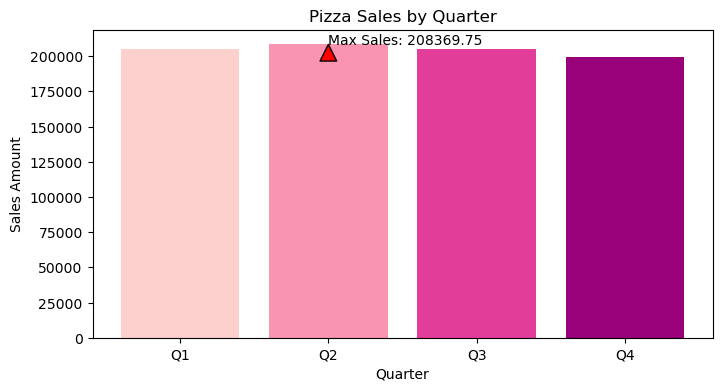

Max Sales Quarter: 2


In [12]:
# Create a gradient palette of pink colors
color_palette = sns.color_palette("RdPu", len(quarterly_sales))

# Create a bar chart with the gradient pink color palette
plt.figure(figsize=(8, 4))
plt.bar(quarter_labels, quarterly_sales, color=color_palette)
plt.title('Pizza Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Highlight the quarter with the highest sales
plt.annotate(f'Max Sales: {quarterly_sales[max_sales_quarter]}', xy=(max_sales_quarter - 1, quarterly_sales[max_sales_quarter]),
             xytext=(max_sales_quarter - 1, quarterly_sales[max_sales_quarter] + 100),
             arrowprops=dict(facecolor='red'))

plt.show()
print("Max Sales Quarter:", max_sales_quarter)

The different-colored bars represent different quarters, so  <span style="color:purple;"> Q2 </span> was the highest, reaching <span style="color:purple;"> 208,369.75 USD </span>.
Next, we will use various bar charts and pie charts to explore the size and popularity of various pizza.

### 3. What size of the pizza is the most popular and their distribution?
#### *To visualize the popular si ze of pizza by orders and their distribution percentage.*

We know that there are four sizes of pizza without considering the name of the product: 'S', 'M', 'L','XL' and 'XXL'. Firstly, the number of occurrences of each pizza size is counted, and the most popular pizza size is obtained by extracting the order count. By creating two subcharts: a bar chart showing the order count for each pizza size, and a pie chart showing the distribution of pizza sizes.

The use of tight_layout() makes the layout of the diagram less tight and ensures that all information is properly displayed.

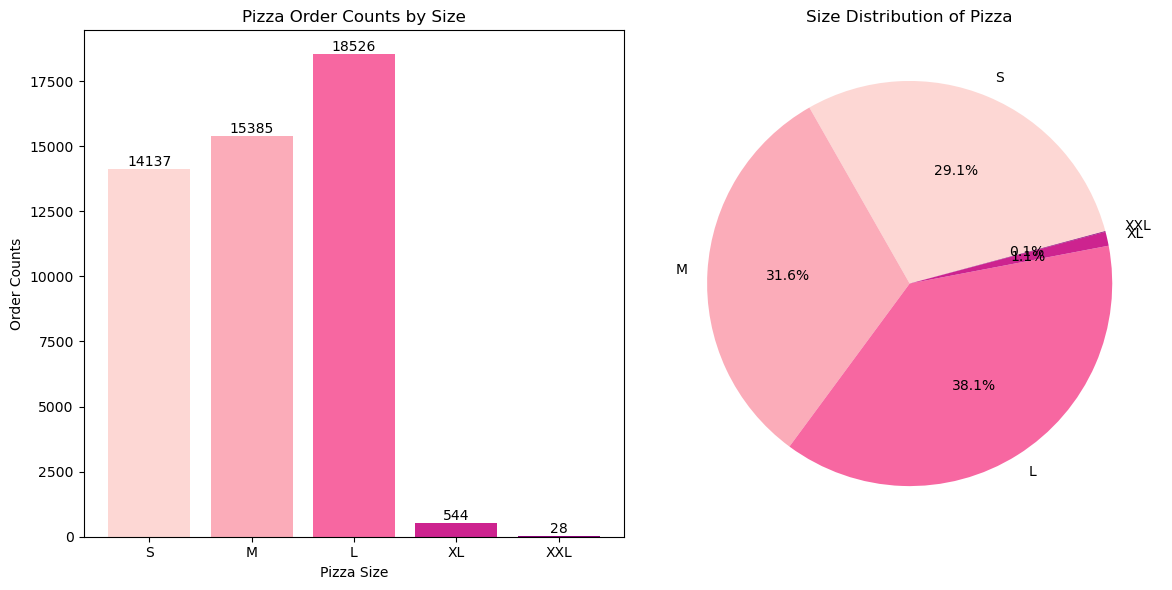

Most Popular Pizza Size: L


In [13]:
# Count the occurrences of each pizza size
size_counts = df['pizza_size'].value_counts()

# Extract the sizes and order counts
sizes = ['S', 'M', 'L','XL', 'XXL']
order_counts = [size_counts.get(size, 0) for size in sizes]

# Get the most popular pizza size
most_popular_size = size_counts.idxmax()

# Define color codes
color_palette = sns.color_palette("RdPu", len(sizes))

# Create the bar chart
plt.figure(figsize=(12, 6))

# Subplot for bar chart
plt.subplot(1, 2, 1)
plt.bar(sizes, order_counts, color=color_palette)
plt.title('Pizza Order Counts by Size')
plt.xlabel('Pizza Size')
plt.ylabel('Order Counts')

# Mark the specific value on each bar
for i, count in enumerate(order_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Subplot for pie chart
plt.subplot(1, 2, 2)
plt.pie(order_counts, labels=sizes, autopct='%1.1f%%', startangle=15, colors=color_palette)
plt.title('Size Distribution of Pizza')

plt.tight_layout()
plt.show()

print("Most Popular Pizza Size:", most_popular_size)

The most popular pizza size is <span style="color:purple;"> ‘L’ </span> , because the order volume of L-size pizza is the largest, and the proportion of L-size pizza has reached <span style="color:purple;"> 38.1%  </span> of the total order number, and <span style="color:purple;"> the second is M-size Pizza </span>.

The sales of each pizza and the quantity of orders they receive may result in inconsistencies in the ranking of the most popular pizza. But we need to explore visually whether we can find common ground.

### 4. What are the Top 5 Pizzas by Sales and by Quantity?
#### *To visualize the TOP5 best-selling Pizzas based on Sales and Quantity.*

To analyze pizza sales by sales and by quantity which will be shown visually in 2 charts with printing. Calculate the total sales for each pizza and store the result in the 'total_sales' column in' df ', and calculate the total sales of all pizzas and store the result in the 'total_annual_sales' variable. Use 'groupby' to calculate total sales by pizza name and store the results in a DataFrame named 'pizza_sales'.

In [14]:
# Calculate the total sales for each pizza
df['total_sales'] = df['quantity'] * df['unit_price']

# Calculate the total annual sales
total_annual_sales = df['total_sales'].sum()

# Calculate the total sales for each pizza
pizza_sales = df.groupby('pizza_name')['total_sales'].sum().reset_index()

'nlargest' is to find the top 5 best-selling pizzas and store the result in 'top_pizzas_sales' and the result of top 5 most sold pizzas will be stored in 'top_pizzas_quantity'. 
The percentage of sales for each pizza will be added to the result as 'top_pizzas_sales' and the result of the percentage quantity sold for each pizza will be added to 'top_pizzas_quantity'.

Top 5 Pizzas by Sales:
                      pizza_name  total_sales  sales_percentage
30        The Thai Chicken Pizza     43434.25          5.310719
0     The Barbecue Chicken Pizza     42768.00          5.229257
4   The California Chicken Pizza     41409.50          5.063152
7       The Classic Deluxe Pizza     38180.50          4.668341
26       The Spicy Italian Pizza     34831.25          4.258828


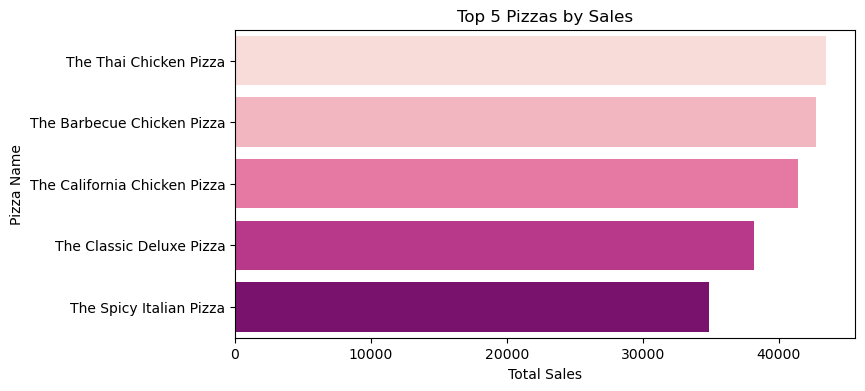

Top 5 Pizzas by Quantity:
                    pizza_name  quantity  quantity_percentage
7     The Classic Deluxe Pizza      2453             4.948158
0   The Barbecue Chicken Pizza      2432             4.905797
12          The Hawaiian Pizza      2422             4.885626
20         The Pepperoni Pizza      2418             4.877557
30      The Thai Chicken Pizza      2371             4.782749


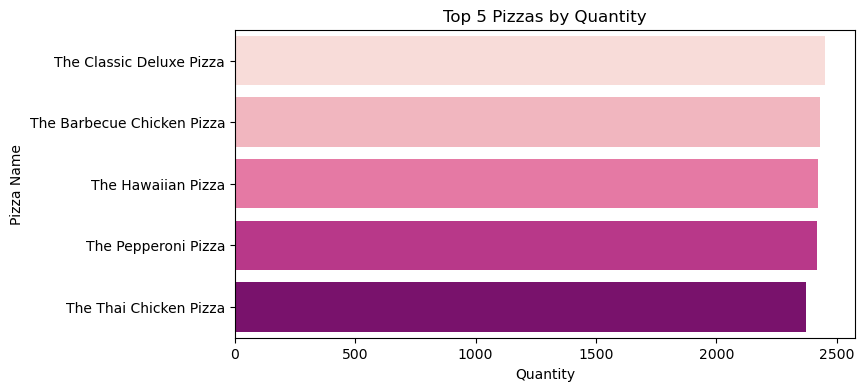

In [15]:
# Find the top 5 pizzas by sales
top_pizzas_sales = pizza_sales.nlargest(5, 'total_sales')

# Calculate the sales percentage for each pizza
top_pizzas_sales['sales_percentage'] = (top_pizzas_sales['total_sales'] / total_annual_sales) * 100

# Calculate the total quantity sold for each pizza
pizza_quantity = df.groupby('pizza_name')['quantity'].sum().reset_index()

# Find the top 5 pizzas by quantity
top_pizzas_quantity = pizza_quantity.nlargest(5, 'quantity')

# Calculate the quantity percentage for each pizza
top_pizzas_quantity['quantity_percentage'] = (top_pizzas_quantity['quantity'] / df['quantity'].sum()) * 100

# Define color codes
color_palette = sns.color_palette("RdPu", len(top_pizzas_sales))

# Display the top 5 pizzas by sales
print("Top 5 Pizzas by Sales:")
print(top_pizzas_sales)

# Plot bar chart for Top 5 Pizzas by Sales
plt.figure(figsize=(8, 4))
sns.barplot(x='total_sales', y='pizza_name', data=top_pizzas_sales, palette=color_palette, hue='pizza_name', legend=False)
plt.title('Top 5 Pizzas by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Name')
plt.show()

# Display the top 5 pizzas by quantity
print("Top 5 Pizzas by Quantity:")
print(top_pizzas_quantity)

# Plot bar chart for Top 5 Pizzas by Quantity
plt.figure(figsize=(8, 4))
sns.barplot(x='quantity', y='pizza_name', data=top_pizzas_quantity, palette=color_palette, hue='pizza_name', legend=False)
plt.title('Top 5 Pizzas by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Pizza Name')
plt.show()

From the chart "Top 5 Pizzas by Sales", <span style="color:purple;"> 'The Thai Chicken Pizza' is the winner as the TOP1 pizza with total sales of 5.31% </span> .

From the chart "Top 5 Pizzas by Quantity", <span style="color:purple;"> 'The Classic Deluxe Pizza' is the winner as the TOP1 pizza with total quantity of 4.95% </span>.

The above comparisons are not based on sizes but just on sales and quantity. What if it is defined with sizes and does it make any differences to the result?

### 5. What are the Top 5 most popular pizzas considering of sizes by Quantity?
#### *To visualize the TOP5 best-selling Pizzas based on Size.*

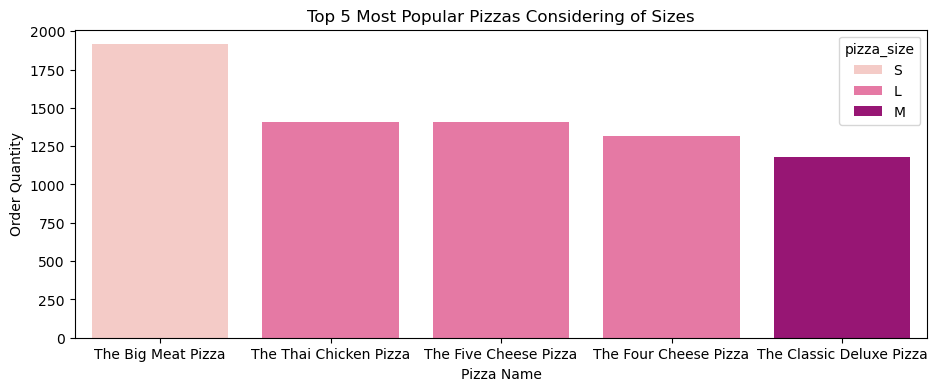

In [23]:
# Calculate the total annual sales for each pizza considering of size
pizza_sales = df.groupby(['pizza_name', 'pizza_size'])['quantity'].sum().reset_index()

# Find the top 5 most popular pizzas
top_pizzas = pizza_sales.nlargest(5, 'quantity')

# Define color codes
color_palette = sns.color_palette("RdPu", 3)

# Visualize the top 5 most popular pizzas and their sizes
plt.figure(figsize=(11, 4))
sns.barplot(x='pizza_name', y='quantity', hue='pizza_size', data=top_pizzas, palette=color_palette)
plt.title("Top 5 Most Popular Pizzas Considering of Sizes")
plt.xlabel("Pizza Name")
plt.ylabel("Order Quantity")
plt.show()

We basically used the same code and tools to visualize the result. Clearly, some pizza names have been changed in this concern, <span style="color:purple;"> 'The Big Meat Pizza' in 'S' size wins with the most quantity among all based on size consideration. </span> 

But what if we want to be more focused on preparing a hit product? Suppose we take the quantity as the measurement standard, considering the size, and without considering the size, what can be the TOP pizza in both concerns? What should be done? It's easy. Find where they overlap. That way we can allocate our resources better, to know the most popular pizzas in optimization.

### 6. No matter for the condition of consideration of size or not, what are the overlapping pizza names of the most popular by orders?
#### *To visualize the overlapped pizza names of the most popular by orders.*

The Venn diagram shows the intersection and difference between the two. As the same as before, we need to find the TOP 5 most popular pizzas regardless of size and not. 'nlargest' and 'groupby' will be used here as before.

In [24]:
# Calculate the number of annual orders for each pizza regardless of size
pizza_sales_total = df.groupby('pizza_name')['quantity'].sum().reset_index()

# Find the top 5 most popular pizzas regardless of size
top_pizzas_total = pizza_sales_total.nlargest(5, "quantity")

# Group the data by pizza name and size, and calculate the sum of quantities
pizza_sales_size = df.groupby(['pizza_name', 'pizza_size'])['quantity'].sum().reset_index()

# Find the top 5 most popular pizzas by size
top_pizzas_size = pizza_sales_size.nlargest(5, "quantity")


Use the set operation to get a collection of pizza names in two rankings. By calculating the intersection of two sets, obtain the pizza name that is both in and in the size ranking regardless of size. Count the number of overlapping pizzas and visulize it by venn diagram.

Add labels to the graph, including the number of overlapping pizzas and the specific name of the pizza. Set the title of the graph to "Comparison of Top 5 Pizzas".

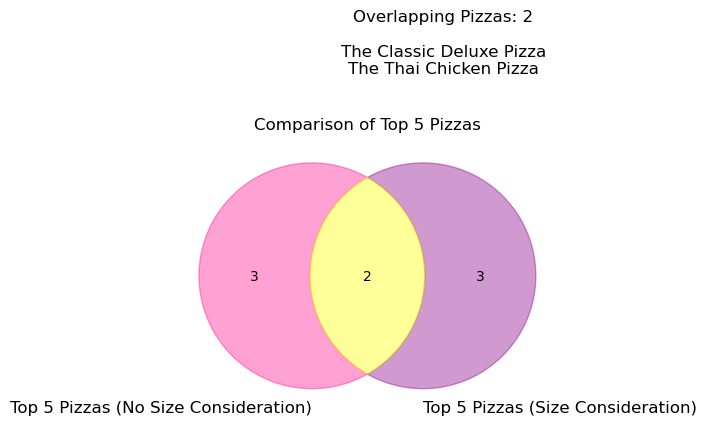

In [25]:
# Get the names of the top pizzas in each category
top_pizzas_total_names = set(top_pizzas_total['pizza_name'])
top_pizzas_size_names = set(top_pizzas_size['pizza_name'])

# Find the overlapping pizza names
overlap_pizzas = top_pizzas_total_names.intersection(top_pizzas_size_names)
overlap_pizzas_count = len(overlap_pizzas)

# Create a Venn diagram
plt.figure(figsize=(5, 5))
venn_diagram = venn2([top_pizzas_total_names, top_pizzas_size_names],
                    set_labels=("Top 5 Pizzas (No Size Consideration)", "Top 5 Pizzas (Size Consideration)"))

# Set colors for the Venn diagram
venn_diagram.get_patch_by_id('10').set_color('#FF1493')  # Set color to pink
venn_diagram.get_patch_by_id('01').set_color('#8B008B')  # Set color to magenta
venn_diagram.get_patch_by_id('11').set_color('yellow')

# Add the overlapping pizza names as labels
plt.text(0.3, 0.8, f"Overlapping Pizzas: {overlap_pizzas_count}\n\n" + '\n'.join(overlap_pizzas),
         fontsize=12, ha='center', color='black')

plt.title("Comparison of Top 5 Pizzas")
plt.show()

YES！We now got the answer that the two overlapped pizzas should be produced more:  <span style="color:purple;"> 'The Classic Deluxe Pizza' and 'The Thai Chicken Pizza' </span> are the overlapped TOP pizzas with or without consideration of size based on quantity.

Continuously, we have to make it widely, finding the best selling pizza category based on orders.

### 7. What is the best-selling pizza category considering of orders? 
#### *To visualize the most popular pizza category by orders.*

Filling the missing value with fill_value=0 and store the result in a DataFrame named category_size_counts. Sorting the categories by calculating the sum of the number of orders in each category to find the pizza category with the highest total number of orders.

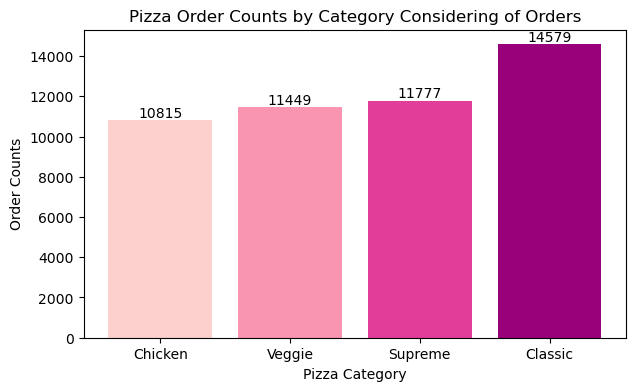

In [26]:
# Group the data by pizza category and size, and calculate the order counts
category_size_counts = df.groupby(['pizza_category', 'pizza_size']).size().unstack(fill_value=0)

# Find the best-selling pizza category
best_selling_category = category_size_counts.sum(axis=1).idxmax()

# Create a bar chart for order counts by pizza category
category_order_counts = category_size_counts.sum(axis=1)
sorted_categories = category_order_counts.sort_values(ascending=True)

# Define color codes
colors = sns.color_palette("RdPu", len(sorted_categories))

plt.figure(figsize=(7, 4))
bars = plt.bar(sorted_categories.index, sorted_categories.values, color=colors)
plt.title('Pizza Order Counts by Category Considering of Orders')
plt.xlabel('Pizza Category')
plt.ylabel('Order Counts')

# Mark the specific value on each bar
for bar in bars:
    count = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

plt.show()

Different colors represent different categories. Therefore, the order volume is sorted from the smallest to the largest category, and <span style="color:purple;"> the category with the largest order volume is' Classic'</span>.

So Plato's may be able to put more marketing efforts in this category to improve revenue. We've known the best-selling pizza and category. If we want to avoid preparing too much raw materials or wasting resources as much as possible, of course, we also need to understand the pizza that is not so popular.

### 8. What are the Top 5 worst selling pizzas without size consideration?
#### *To visualize the pizza names of the worst popular by Quantity and by Sales.*

Focusing on the five pizzas that sell the least quantity and visualize the results in the form of bar charts and pie charts. Using 'nsmallest' to find the five pizzas with the smallest number of sales and store the results in worst_selling_pizzas. Then calculating the total sales of all pizzas, and the total sales of the five pizzas with the lowest quantity of sales.

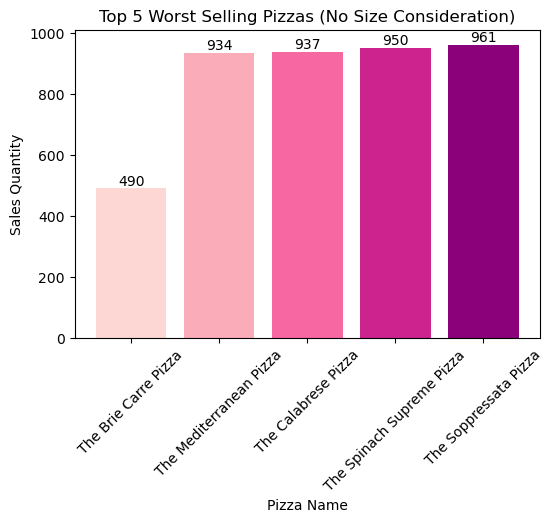

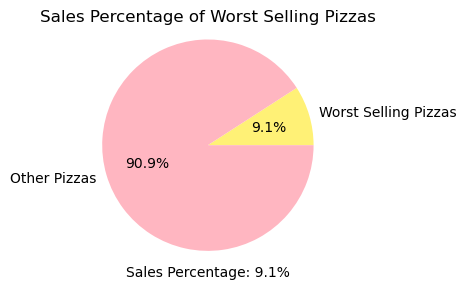

In [27]:
# Group the data by pizza name and calculate the sum of quantities and total sales
pizza_sales = df.groupby('pizza_name').agg({'quantity': 'sum', 'unit_price': 'mean'}).reset_index()
pizza_sales['total_sales'] = pizza_sales['quantity'] * pizza_sales['unit_price']

# Sort the pizzas by sales quantity in ascending order
worst_selling_pizzas = pizza_sales.nsmallest(5, "quantity")

# Calculate the total sales for all pizzas
total_sales = pizza_sales['total_sales'].sum()

# Add labels to the bars with the sales quantity
plt.figure(figsize=(6, 4))

# Define color codes
bar_colors = sns.color_palette("RdPu", len(worst_selling_pizzas))

# Change the bar color to pink
plt.bar(worst_selling_pizzas['pizza_name'], worst_selling_pizzas['quantity'], color=bar_colors)
plt.xlabel('Pizza Name')
plt.ylabel('Sales Quantity')
plt.title('Top 5 Worst Selling Pizzas (No Size Consideration)')

for i, value in enumerate(worst_selling_pizzas['quantity']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

# Calculate the sales percentage for the worst selling pizzas
worst_selling_sales = worst_selling_pizzas['total_sales'].sum()
sales_percentage = worst_selling_sales / total_sales * 100

# Create a pie chart to visualize the sales percentage
labels = ['Worst Selling Pizzas', 'Other Pizzas']
sizes = [sales_percentage, 100 - sales_percentage]

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors = [ '#FFF176','#FFB6C1'], autopct='%1.1f%%')
plt.title('Sales Percentage of Worst Selling Pizzas')
plt.text(0, -1.2, f'Sales Percentage: {sales_percentage:.1f}%', ha='center', va='center')
plt.axis('equal')
plt.show()

Without considering the size, the names of the TOP5 of pizza in terms of sales quantity are shown in the chart: <span style="color:purple;">'The Bire Carre Pizza, 'The Mediterranean Pizza', 'The Calabrese Pizza', 'The Spanish Supreme Pizza',  'The Soppressata Pizza'.</span> 

Among them, <span style="color:purple;">'The Brie Carre Pizza', which ranked the TOP as the worst,</span> even sold less than 500 units. It even creates a huge distance from the other numbers.

<span style="color:purple;"> And these worst-selling pizza even accounted for 9.1% of total sales.</span>

Modern people pay attention to health, so Plato's Pizza also developed veggie pizza. If we want to make more accurate product sales for vegetarians or dieters, can we find out from the data whether they have greater consumption demand for S-sized pizza? If we can understand their preferences, or we can find business opportunities.

### 9. Is there any preference implications of size for those veggie-pizza orderers (for diet keeper or vegetarian)?
#### *To visualize the preference of pizza size chosen by vegetarians.*

Using conditional filtering, select the data for the pizza category "Veggie". Using 'value_counts' to calculate the number of orders by pizza size and store the results in vegetarian_size_counts.

In [28]:
# Filter the dataframe for Veggie category pizzas
veggie_pizzas = df[df['pizza_category'] == 'Veggie']

# Group the data by pizza size, and calculate the order counts
vegetarian_size_counts = veggie_pizzas['pizza_size'].value_counts()

Calculating the number of orders for each size as a proportion of the total number of orders to get the preference for vegetarian pizza on different sizes and storing the result in vegetarian_size_preference. Finally, the bar chart shows the result with percentage labels above in different colors.

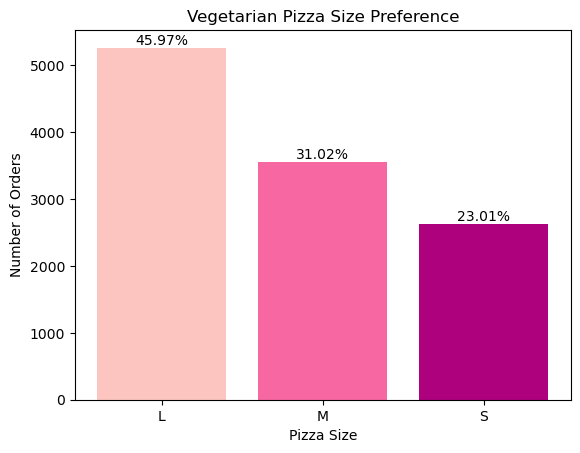

Vegetarian Pizza Size Preference:
pizza_size
L    0.459691
M    0.310245
S    0.230064
Name: count, dtype: float64


In [29]:
# Calculate the preference for each size pizza by Vegetarian
total_vegetarian_count = vegetarian_size_counts.sum()
vegetarian_size_preference = vegetarian_size_counts / total_vegetarian_count

# Create a bar chart for Vegetarian pizza size preference
sizes = vegetarian_size_counts.index

# Define color codes
bar_colors = sns.color_palette("RdPu", len(vegetarian_size_counts))

plt.bar(sizes, vegetarian_size_counts, color = bar_colors)
plt.title('Vegetarian Pizza Size Preference')
plt.xlabel('Pizza Size')
plt.ylabel('Number of Orders')

# Add percentage labels to the bars
for i, count in enumerate(vegetarian_size_counts):
    percentage = round((count / total_vegetarian_count) * 100, 2)
    plt.text(i, count, f'{percentage}%', ha='center', va='bottom')
             
plt.show()

print("Vegetarian Pizza Size Preference:")
print(vegetarian_size_preference)

Contrary to our expectations, we imagine that vegetarians or diet keepers might cut down on their pizza intake and consider a smaller pizza. However, it is found through the data that  <span style="color:purple;"> 45% of the veggie pizza orders are L-size, </span> while the number of S-size veggie pizza orders is only 23%.

In order to obtain more sales of pizza in one order, we need to know how many customers place more than just 1 pizza at one time, so as to carry out promotion or package sales at some time to improve profits.

### 10. What's the percentage for the people ordering more than one pizza in an order?
#### *To visualize the people ordering more than one pizza and those don't.*

Counting the number of unique order ids and the number of unique pizzas in each orderusing 'nunique( )'. Calculating the number of orders with two or more pizzas as well as the percentage of orders with two or more pizzas in the total order. The pie chart has two sections representing orders with two or more pizzas and orders with only one pizza.

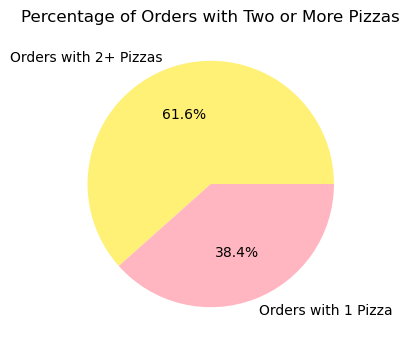

In [30]:
# Count the number of unique order IDs
total_orders = df['order_id'].nunique()

# Group by order ID and count the number of unique pizzas in each order
orders_with_multiple_pizzas = df.groupby('order_id')['pizza_id'].nunique()

# Count the number of orders with two or more pizzas
orders_with_multiple_pizzas_count = (orders_with_multiple_pizzas >= 2).sum()

# Calculate the percentage of orders with two or more pizzas
percentage_orders_with_multiple_pizzas = (orders_with_multiple_pizzas_count / total_orders) * 100

# Visualize the result (optional)
plt.figure(figsize=(6, 4))
plt.pie([orders_with_multiple_pizzas_count, total_orders - orders_with_multiple_pizzas_count], 
        labels=['Orders with 2+ Pizzas', 'Orders with 1 Pizza'], autopct='%1.1f%%', colors=['#FFF176','#FFB6C1'])
plt.title('Percentage of Orders with Two or More Pizzas')
plt.show()

Through the pie chart, we were surprised to find that <span style="color:purple;"> the proportion of ordering more than two pizzas in one order reached 61.6%, </span> almost 1.5 times that of ordering only one pizza.

The data also mentions the ingredients needed for different pizza. We can also find some business opportunities. For example, by analyzing the TOP15 ingredients that are used most frequently and putting them in a better place where they can be easily reached to save time, or making real-time estimates of how much ingredients will be used.

### 11. What is the most frequently used TOP15 ingredient?
#### *To visualize the ingredients used condition.*

Use plt.rcParams[' font-sans-serif '] = 'DejaVu Sans' to set the default font to ensure that the Chinese characters are displayed correctly. ‘value_counts()’ calculates the frequency of each ingredient and creates a DataFrame containing the ingredient and frequency. Extracting the top 15 most commonly used ingredients from the dosing frequency DataFrame.

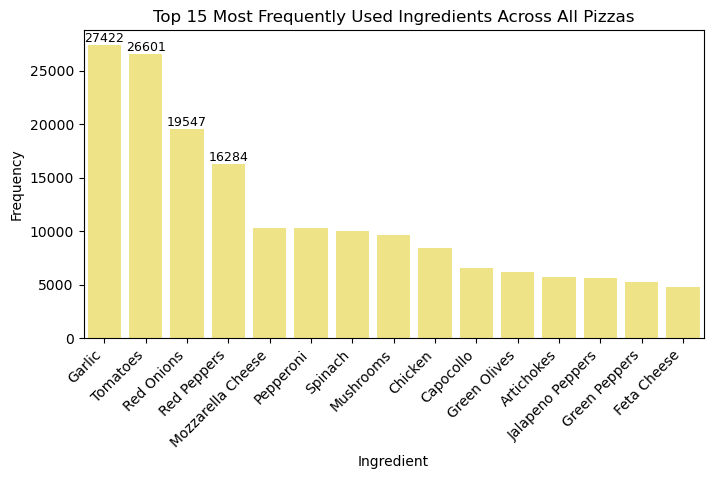

In [31]:
# Use the default font
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

# Extract the pizza name and size
# Remove the size information at the end
df['pizza_name'] = df['pizza_id'].apply(lambda x: x[:-2])
# Extract size information
df['pizza_size'] = df['pizza_size'].apply(lambda x: x.upper())

# Create a list to store the ingredients
ingredients_list = []

# Iterate over rows and split the ingredients
for ingredients_str in df['pizza_ingredients']:
    # Split the ingredients string into a list
    ingredients_split = ingredients_str.split(', ')
    ingredients_list.extend(ingredients_split)

# Create a dataframe with ingredients and their frequencies
ingredients_df = pd.DataFrame({'ingredient': ingredients_list})
ingredient_frequency = ingredients_df['ingredient'].value_counts().reset_index()
ingredient_frequency.columns = ['ingredient', 'frequency']

# Select the top 15 ingredients
top_15_ingredients = ingredient_frequency.head(15)

# Create a bar plot using Seaborn for the top 15 ingredients
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='ingredient', y='frequency', data=top_15_ingredients, color='#FFF176')
plt.title('Top 15 Most Frequently Used Ingredients Across All Pizzas')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Annotate the top 4 ingredients with their frequencies
for i, (index, row) in enumerate(top_15_ingredients.head(4).iterrows()):
    ax.text(i, row['frequency'] + 0.1, f'{row["frequency"]}', ha='center', va='bottom', fontsize=9)

plt.show()

Garlic, Tomatoes, Red Onion and Red Peppers are the most commonly used ingredients, <span style="color:purple;"> Garlic </span> even ranks first.

So is the price distribution reasonable? Do different pizzas have different prices? The following codes are used for a complex learning by showing the heatmap. Because it's not hard to imagine the price distribution sometimes do influence the desire of purchasing. A good price can boosts sales while the lose will come for being expensive.

### 12. What is the distribution of prices? What are the prices of different Pizza?
#### *To visualize the price distribution.*

By analyzing the price changes of different pizzas, and visualizing the average percentage change in price of different sizes of pizzas in the form of heat maps.

Using ‘df['pizza_name'].unique()’ to get all the unique pizza names and going through each pizza name and doing it for each pizza name. Using conditional filtering, get data for the current pizza name for each size, calculating the percentage change in price relative to the minimum available size and adding the results in dictionary form to the 'price_changes_data' list.

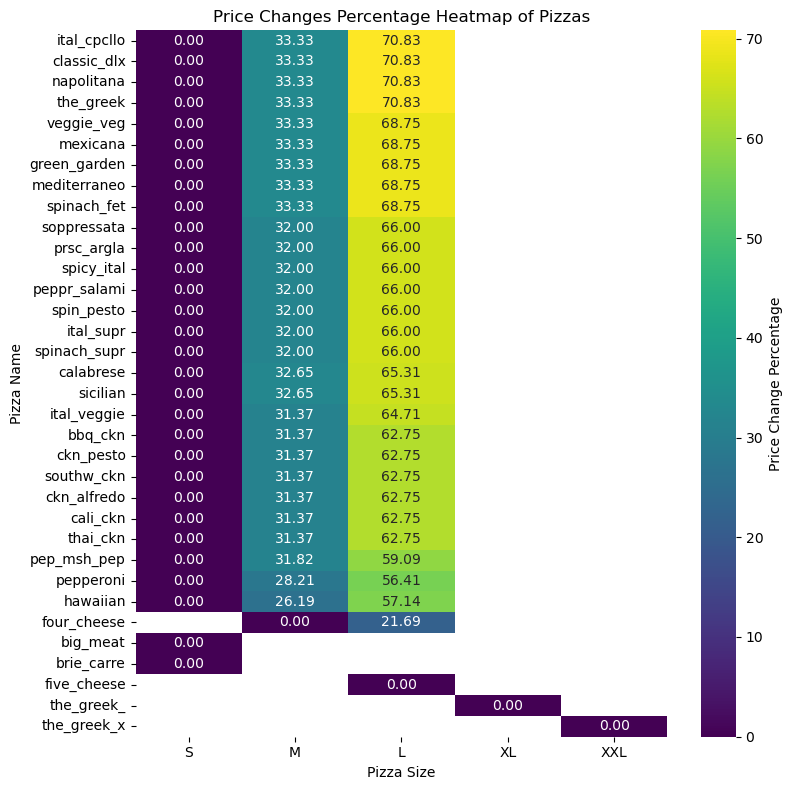

In [32]:
# Create an empty list to store price changes for each pizza
price_changes_data = []

# Iterate over each unique pizza_name
for pizza_name in df['pizza_name'].unique():
    # Filter the dataframe for the current pizza_name
    pizza_df = df[df['pizza_name'] == pizza_name]

    # Sort the pizza sizes for proper plotting order
    pizza_sizes = sorted(pizza_df['pizza_size'].unique(), key=lambda x: ('S', 'M', 'L', 'XL', 'XXL').index(x))

    # Iterate over each size and calculate price change percentage
    for pizza_size in pizza_sizes:
        # Check if the current pizza_size is available
        if pizza_size in pizza_df['pizza_size'].values:
            # Calculate the price change percentage relative to the smallest available size
            price_change_percentage = (
                (pizza_df.loc[pizza_df['pizza_size'] == pizza_size, 'unit_price'].values[0] -
                 pizza_df.loc[pizza_df['pizza_size'] == pizza_sizes[0], 'unit_price'].values[0]) /
                pizza_df.loc[pizza_df['pizza_size'] == pizza_sizes[0], 'unit_price'].values[0] * 100
            )

            # Append the results to the list
            price_changes_data.append({
                'Pizza Name': pizza_name,
                'Pizza Size': pizza_size,
                'Price Change Percentage': price_change_percentage
            })

# Create a DataFrame from the list
price_changes_df = pd.DataFrame(price_changes_data)

# Calculate the average price change percentage for each Pizza Name
average_price_changes = price_changes_df.groupby('Pizza Name')['Price Change Percentage'].mean().sort_values(ascending=False)

# Create a heatmap for better representation
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
heatmap_data = price_changes_df.pivot(index='Pizza Name', columns='Pizza Size', values='Price Change Percentage')
# Reorder rows based on average price change percentage
heatmap_data = heatmap_data.reindex(index=average_price_changes.index, columns=['S', 'M', 'L', 'XL', 'XXL'])
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Price Change Percentage'})
plt.title('Price Changes Percentage Heatmap of Pizzas')

# Adjust layout
plt.tight_layout()
plt.show()

The x axis of the heat map is the size of the pizza, the y axis is the name of the pizza, and the color indicates the percentage change in price. The color of the heat map varies according to the size of the percentage change, while the specific values are displayed using annotations.

Therefore, there are <span style="color:purple;">ital_cpcllo, classic_dlx, napolitana, veggie_veg, and the_greek,</span>  these 4 kinds of pizza with the biggest price changes.

### 13. Does the price have any correlation about the raw material?
#### *To visualize the other facotor may be relevant to the raw material.*

Extracting the pizza ingredient information from the data frame. Using this data to analyze the average unit price of different ingredients in an S-size pizza. At the same time, the price correlations between the different ingredients were explored through heatmaps, and the correlation scores of each pizza for the specified ingredients were calculated.

The first thing to do is extract the pizza ingredient information:
Define an 'extract_ingredients' function to split the comma-separated ingredient string into a list of ingredients.
apply the function to the ‘pizza_ingredients’ column using the apply method, creating a new column ‘ingredients_list’ that contains the list of ingredients for each pizza.

In [33]:
# Function to extract ingredients from a comma-separated string
def extract_ingredients(ingredients_string):
    if pd.notna(ingredients_string):
        return [ingredient.strip() for ingredient in ingredients_string.split(',')]
    else:
        return []

# Apply the function to create a new column with lists of ingredients
df['ingredients_list'] = df['pizza_ingredients'].apply(extract_ingredients)

Using the 'isin' filter to ensure that each pizza name contains S, M, and L sizes to get a valid pizza name, getting the data box 'df_valid' containing a valid pizza name.

In [34]:
# Filter out pizza_names that do not cover S, M, L sizes
valid_pizza_names = df.groupby('pizza_name').filter(lambda x: set(x['pizza_size']) == {'S', 'M', 'L'})['pizza_name'].unique()
df_valid = df[df['pizza_name'].isin(valid_pizza_names)]

Since we only need S-size pizza as data, we need to filter S-size rows:
Select the S-size row from ‘df_valid’ to get the subdata frame ‘df_S_size’, and use unique method to get the ingredient combination of S-size pizza. For each unique combination of ingredients, calculate the average unit price of the corresponding S-size pizza. Building visual Dataframes and sorting them in descending order by average unit price.

In [35]:
# Filter rows with 'S' size
df_S_size = df_valid[df_valid['pizza_size'] == 'S']

# Identify unique ingredient combinations for 'S' size pizzas
unique_ingredient_combinations = df_S_size['ingredients_list'].apply(tuple).unique()

# Create a dictionary to store the average unit price for each ingredient combination
ingredient_price_dict = {}

# Calculate the average unit price for each ingredient combination
for ingredients in unique_ingredient_combinations:
    df_subset = df_S_size[df_S_size['ingredients_list'].apply(tuple) == ingredients]
    avg_price = df_subset['unit_price'].mean()
    ingredient_price_dict[ingredients] = avg_price

# Convert the dictionary to a DataFrame for visualization
ingredient_price_df = pd.DataFrame(list(ingredient_price_dict.items()), columns=['Ingredients', 'Average Unit Price'])

# Sort the DataFrame by average unit price in descending order
ingredient_price_df = ingredient_price_df.sort_values(by='Average Unit Price', ascending=False)

"TOP ingredients" refers to the combination of ingredients that has the highest average unit price in the 'S' size pizza. In this context, by calculating the average unit price of each unique ingredient combination in the 'S' size pizza, and then sorting in descending order of the average unit price, it is possible to determine which ingredient combinations are considered the most expensive or most valuable. Listed in descending order of average unit price, 'ingredient_price_df' shows the most expensive combination of ingredients in the 'S' sized pizza, the top ingredients.

Correlation heat maps are used to show the average univalent correlation between different ingredients. For each pizza name, calculate the number of ingredients it contains as a relevance score.

/var/folders/xb/_f5z3gm16bx0r_gxh7tvj9x00000gn/T/ipykernel_58421/1879418713.py:8: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  plt.tight_layout()
/Applications/anaconda3/envs/Introduction_of_Data_Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


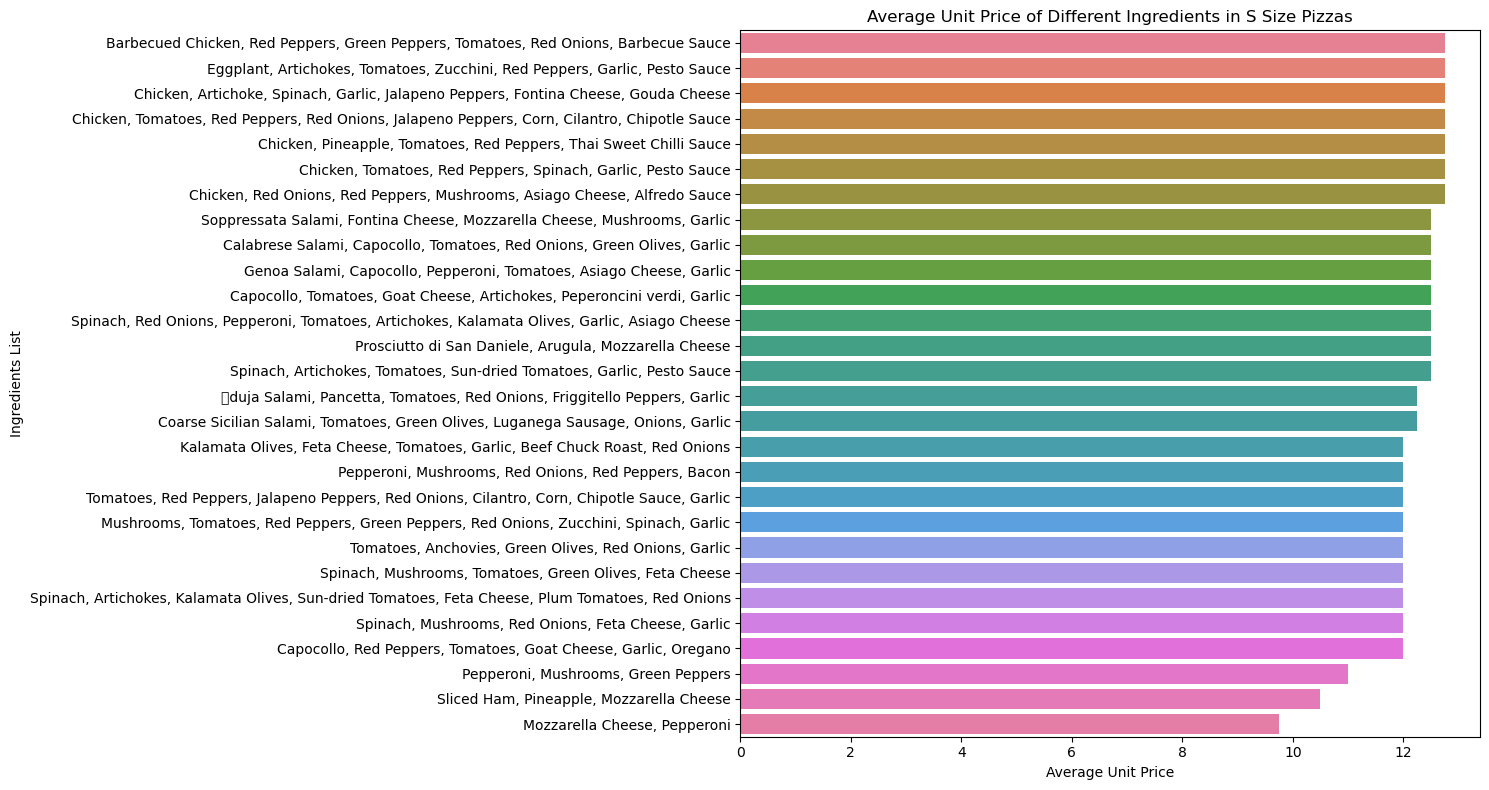

/Applications/anaconda3/envs/Introduction_of_Data_Science/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.draw()


      Pizza Name  Relevance Score
26  peppr_salami                3
9   spinach_supr                3
33   the_greek_x                2
31    the_greek_                2
11   ital_cpcllo                2
8      the_greek                2
17     pepperoni                2
12    spicy_ital                2
25  mediterraneo                2
10  green_garden                2
1    classic_dlx                1
0       hawaiian                1
4       mexicana                1
5       thai_ckn                1
6     prsc_argla                1
7        bbq_ckn                1
2    five_cheese                1
3      ital_supr                1
16      cali_ckn                1
15    southw_ckn                1
14    veggie_veg                1
13    spin_pesto                1
21   four_cheese                1
18     ckn_pesto                1
20   soppressata                1
19      big_meat                1
24   ital_veggie                1
23     calabrese                1
22    napolita

/Applications/anaconda3/envs/Introduction_of_Data_Science/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


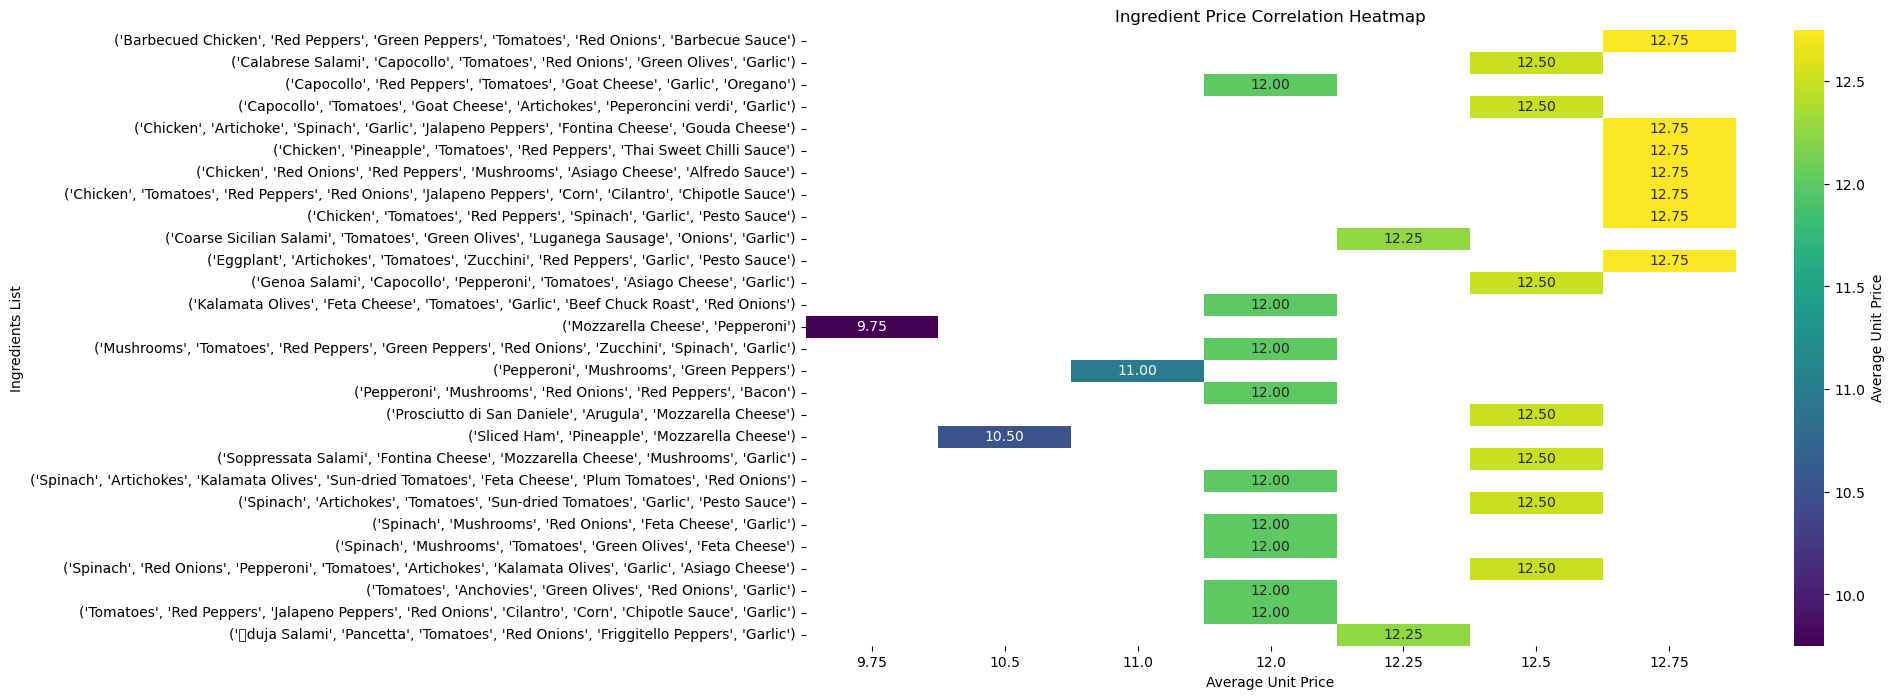

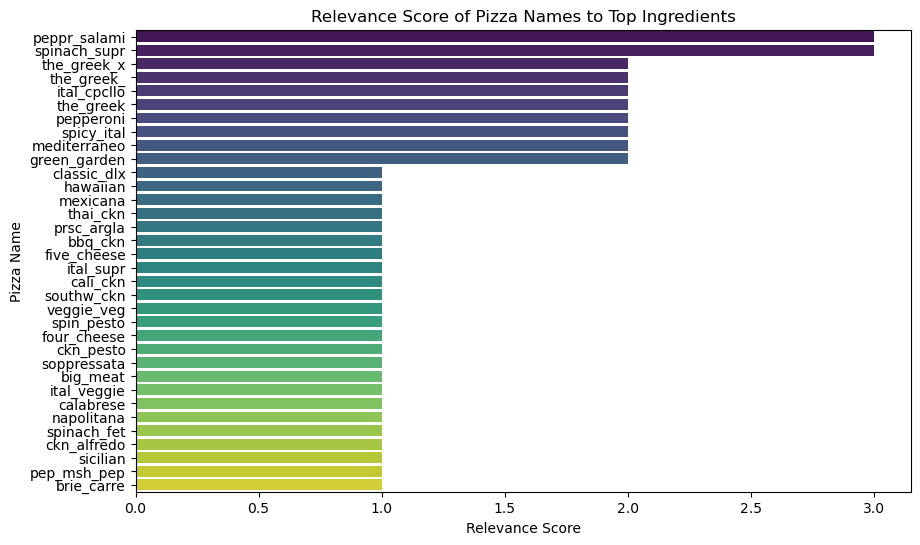

In [36]:
# Plotting
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=ingredient_price_df, x='Average Unit Price', y=ingredient_price_df['Ingredients'].apply(lambda x: ', '.join(x)), hue=ingredient_price_df['Ingredients'].apply(lambda x: ', '.join(x)), dodge=False, legend=False)
plt.title('Average Unit Price of Different Ingredients in S Size Pizzas')
plt.xlabel('Average Unit Price')
plt.ylabel('Ingredients List')

plt.tight_layout()
plt.show()

# Create a pivot table for better representation
ingredient_price_pivot = ingredient_price_df.pivot(index='Ingredients', columns='Average Unit Price', values='Average Unit Price')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(ingredient_price_pivot, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Average Unit Price'})
plt.title('Ingredient Price Correlation Heatmap')
plt.xlabel('Average Unit Price')
plt.ylabel('Ingredients List')

# Identify top ingredients for correlation search
top_ingredients = ['Cheese', 'Tomatoes', 'Pepperoni']  # Replace with your actual top ingredients

# Extract unique pizza names
unique_pizza_names = df['pizza_name'].unique()

# Create a dictionary to store the relevance score for each pizza_name
relevance_scores = {}

# Iterate over each pizza_name
for pizza_name in unique_pizza_names:
    # Extract ingredients for the current pizza_name
    pizza_ingredients = df[df['pizza_name'] == pizza_name]['pizza_ingredients'].iloc[0]

    # Calculate relevance score based on the number of top ingredients present
    relevance_score = sum(ingredient in pizza_ingredients for ingredient in top_ingredients)

    # Store the relevance score in the dictionary
    relevance_scores[pizza_name] = relevance_score

# Convert the dictionary to a DataFrame for better visualization
relevance_df = pd.DataFrame(list(relevance_scores.items()), columns=['Pizza Name', 'Relevance Score'])

# Sort DataFrame by relevance score in descending order
relevance_df = relevance_df.sort_values(by='Relevance Score', ascending=False)

# Print or visualize the results
print(relevance_df)

# Optionally, you can visualize the results in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=relevance_df, x='Relevance Score', y='Pizza Name', palette=sns.color_palette('viridis', n_colors=len(relevance_df)), dodge=False, legend=False, hue='Pizza Name')
plt.title('Relevance Score of Pizza Names to Top Ingredients')
plt.xlabel('Relevance Score')
plt.ylabel('Pizza Name')
plt.show()

This code generates multiple charts, each with the following purpose and information:

#### 1.  Average unit price list of ingredients bar chart:
- The first section creates a bar chart with the average unit price of the ingredients on the horizontal axis and the list of ingredients on the vertical axis. The chart shows the average unit price of different ingredients in an S-size pizza, with different ingredient lists differentiated by color.

##### <span style="color:purple;">The corresponding ingredients of pizza with the highest average unit price of different raw materials are:</span>
- Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce
- Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce
- Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese
- Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce
- Chicken, Pineapple, Tomatoes, Red Peppers, Thai sweet Chilli sauce
- Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce
- Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce

#### 2. Price correlation thermal map: 
- The second part creates a heat map showing the average unit price correlation between the different components. The darker the color of the heat map, the higher the correlation.

##### <span style="color:purple;">The correlation between the average unit price of pizza ingredients using Mozzarella Cheese and Pepperoni as raw material is the highest, indicating that the price of raw materials may affect the selling price of the pizza. </span>

#### 3. Bar chart of correlation scores for top ingredients: 
- The third section creates a bar chart with relevance scores on the x axis and pizza names on the y axis. The chart shows each pizza's relevance score for the specified top ingredient, with colors distinguishing different pizza names.

##### <span style="color:purple;">Through Relevance Score, we can calculate that the <span style="color:purple;"> pizza names most relevant to raw materials are peppr_salami and spinach_supr.</span>

### 14. Correlation study between various factors in pizza sales
#### *To visualize for correlation analysis.*

This part uses data preprocessing, feature engineering, and correlation analysis.

LabelEncoder is used to label the 'pizza_name' column and convert it to numeric form. The classification columns ('pizza_size', 'pizza_category', 'pizza_ingredients') are thermologically encoded using 'pd.get_dummies' to convert them to binary form so that these classification information can be taken into account when modeling. Using Seaborn to draw a heat map of the correlation matrix to visually show the correlation between the columns.

Data preprocessing: Some key columns were selected.

In [37]:
# Select relevant columns including 'pizza_name', 'quantity', and other factors of interest
selected_columns = ['pizza_name', 'quantity', 'unit_price', 'pizza_size', 'pizza_category', 'pizza_ingredients']
df_selected = df[selected_columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Calculate total sales for each pizza by multiplying 'quantity' and 'unit_price'
df_selected['total_sales'] = df_selected['quantity'] * df_selected['unit_price']

Feature engineering: Unique thermal coding is performed so that this information can be used in subsequent modeling.

In [38]:
# Label encode 'pizza_name' column
label_encoder = LabelEncoder()
df_selected['pizza_name'] = label_encoder.fit_transform(df_selected['pizza_name'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_selected, columns=['pizza_size', 'pizza_category', 'pizza_ingredients'], prefix=['size', 'category', 'ingredients'])

# Group by 'pizza_name' and calculate the sum of 'quantity', 'total_sales', and 'unit_price' for each pizza
df_grouped = df_encoded.groupby('pizza_name').agg({'quantity': 'sum', 'total_sales': 'sum', 'unit_price': 'sum'}).reset_index()

Correlation analysis: 'groupby' and 'corr'of Pandas are used to aggregate the data grouped by 'pizza_name'. The correlation matrix of 'quantity', 'total_sales', 'unit_price' and other indexes is obtained.

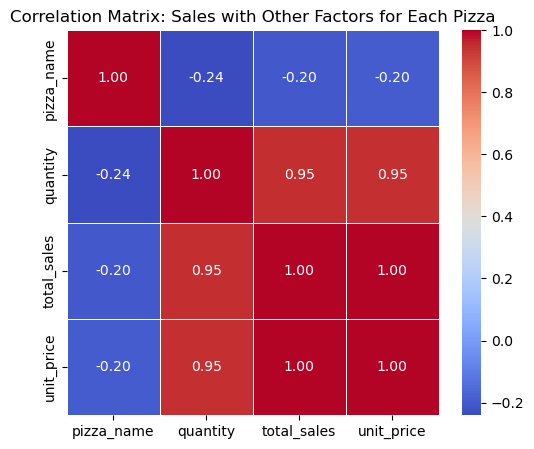

In [39]:
# Extract the correlation matrix
correlation_matrix = df_grouped.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Sales with Other Factors for Each Pizza')
plt.show()

If the correlation is negative, it is negative, and vice versa.

As can be seen from the correlation matrix,<span style="color:purple;"> total sales & quantity, total sales & unit price are positively correlated.</span> 

The factors that are negatively correlated do not show a market law that can be captured.

<span style="color:purple;">  According to the above chart, the proportion of ordering more than two pizzas at one time exceeds 60%. It is not difficult to see that when the unit price is high, total sales will increase. </span>

# SECTION 3:  CONCLUSION FOR EXPLORATION
### The enlightenment by sales trend and customer preference analysis to the resource optimization inspiration.

*From the above charts and analysis, what business implications do we get, and how to better allocate resources to improve sales?*

###### <span style="color:purple;"> It can be seen from the correlation matrix that total sales are positively correlated with quantity and total sales are positively correlated with unit price. It is not difficult to see that total sales will increase when unit prices are high. We can also help merchants achieve profit optimization through the following specific adjustments.</span>

- For some <span style="color:purple;">important holidays</span> in the United States, such as <span style="color:purple;"> Thanksgiving,</span> Plato's stores can hire <span style="color:purple;">more human resources and prepare more ingredients,</span> because the order volume on that day is the highest of the year, and the service speed can greatly improve customer loyalty.

- In the overall quarterly observation, the sales volume in the second quarter is the highest in the four quarters, and <span style="color:purple;"> the food materials and human resources in the second quarter should also be improved and optimized </span> accordingly to maximize the benefits.

- <span style="color:purple;"> L size pizza is the most popular,</span>  and its order volume is also the largest, followed by M size. When considering the preparation of packaged ingredients and food making tools, more L size and M size <span style="color:purple;"> cooking or packaging materials</span> can be prepared according to this data to avoid shortage.

- The most popular pizza size is "L", followed by m pizza. In the case of developing new flavors, <span style="color:purple;"> each pizza flavor should also be able to choose L size.</span>  However, classic is always classic, <span style="color:purple;"> and classic pizza has the best sales performance in all categories.</span>  When considering the development and sales of new products, businesses must pay attention to the classic category pizza and maintain the production level. Due to people's attention to eating habits, in the case of size, S-size pizza with higher meat content has better sales volume. It is possible to consider developing some S-size pizza with more balanced nutrition for health management, or to sell the pizza with higher meat content into S-size health packages.


- For pizza with top sales and quantity ranking, it is undeniable that businesses should <span style="color:purple;"> prepare more ingredients and maintain the original price of these products with good sales performance or raise the price appropriately to improve profits. </span> In particular, for overlapping product names that rank high in terms of sales volume considering size and without considering size, they are the most popular in any aspect. Because of their own popularity, they largely bring profits. From the list of the worst sellers, there must be one of the worst sellers. In the case of such an extremely poor sales volume, Plato's can properly <span style="color:purple;"> consider canceling this product.</span>  On the one hand, it saves products and manpower, and on the other hand, it can focus more energy on other products that sell better.


- The traditional impression is that vegetarians or dieters may reduce their pizza intake and consider a smaller pizza. However, the data found that 45% of vegetable pizza orders were L-size, while only 23% were S-size. It may be because <span style="color:purple;">the price of vegetable pizza is relatively cheap compared to other prices or because vegetarians want to meet the normal calorie intake through a larger amount of food.</span> Through the number of single items in an order, it is not difficult to find that consumers point more than two products at a time, and the proportion is not small, which is likely to be the amount of family dining. Because pizza often brings a sense of sharing. In view of this consumption habit, Plato's can <span style="color:purple;"> offer certain discounts for orders of more than two pizzas delivered at one time or set up packages </span> containing two pizzas or even more to attract consumers.


- Pizza uses a lot of ingredients. Ingredients used frequently should <span style="color:purple;"> be placed in the most accessible area to reduce the production time,</span> thus speeding up the production speed. pizza, which has the highest correlation between price and raw materials, because the price of raw materials is also relatively expensive, <span style="color:purple;"> to ensure the preservation environment of raw materials,</span> can greatly reduce losses. Especially some cheese and meat raw materials, improper preservation is easy to deteriorate and cause unnecessary losses.